# Simulation results
Natalia Vélez, March 2022

In [1]:
%matplotlib inline

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from utils import read_json, gsearch

sns.set_style('white')
sns.set_context('talk')

Load parameter estimates:

In [73]:
param_files = gsearch('outputs/parameter_recovery/*.json')
param_files.sort()

param_estimates = pd.concat([pd.read_json(f) for f in param_files])
param_estimates = (
    param_estimates
    [['x', 'label', 'weights', 'temp' ,'iter']]
    .rename(columns={'x': 'mle'})
)
param_estimates['condition'] = param_estimates.weights.apply(lambda x: f'[{x[0]:0.2f}, {x[1]:0.2f}, {x[2]:0.2f}]')
print(param_estimates.shape)
param_estimates.head()

(150, 6)


,mle,label,weights,temp,iter,condition
0,"[0.0, 0.36180466150976504, 0.6381953385122351,...",density,"[0.0, 0.0, 1.0]",2.5,0,"[0.00, 0.00, 1.00]"
1,"[0.09377552182311501, 0.0, 0.9062244781768851,...",density,"[0.0, 0.0, 1.0]",2.5,1,"[0.00, 0.00, 1.00]"
2,"[1.278949419149325e-10, 0.7594667051047881, 0....",density,"[0.0, 0.0, 1.0]",2.5,2,"[0.00, 0.00, 1.00]"
3,"[0.014289720990814, 0.7946242800695671, 0.1910...",density,"[0.0, 0.0, 1.0]",2.5,3,"[0.00, 0.00, 1.00]"
4,"[0.012052334924706, 0.7963678923358951, 0.1915...",density,"[0.0, 0.0, 1.0]",2.5,4,"[0.00, 0.00, 1.00]"


Plot parameter recovery:

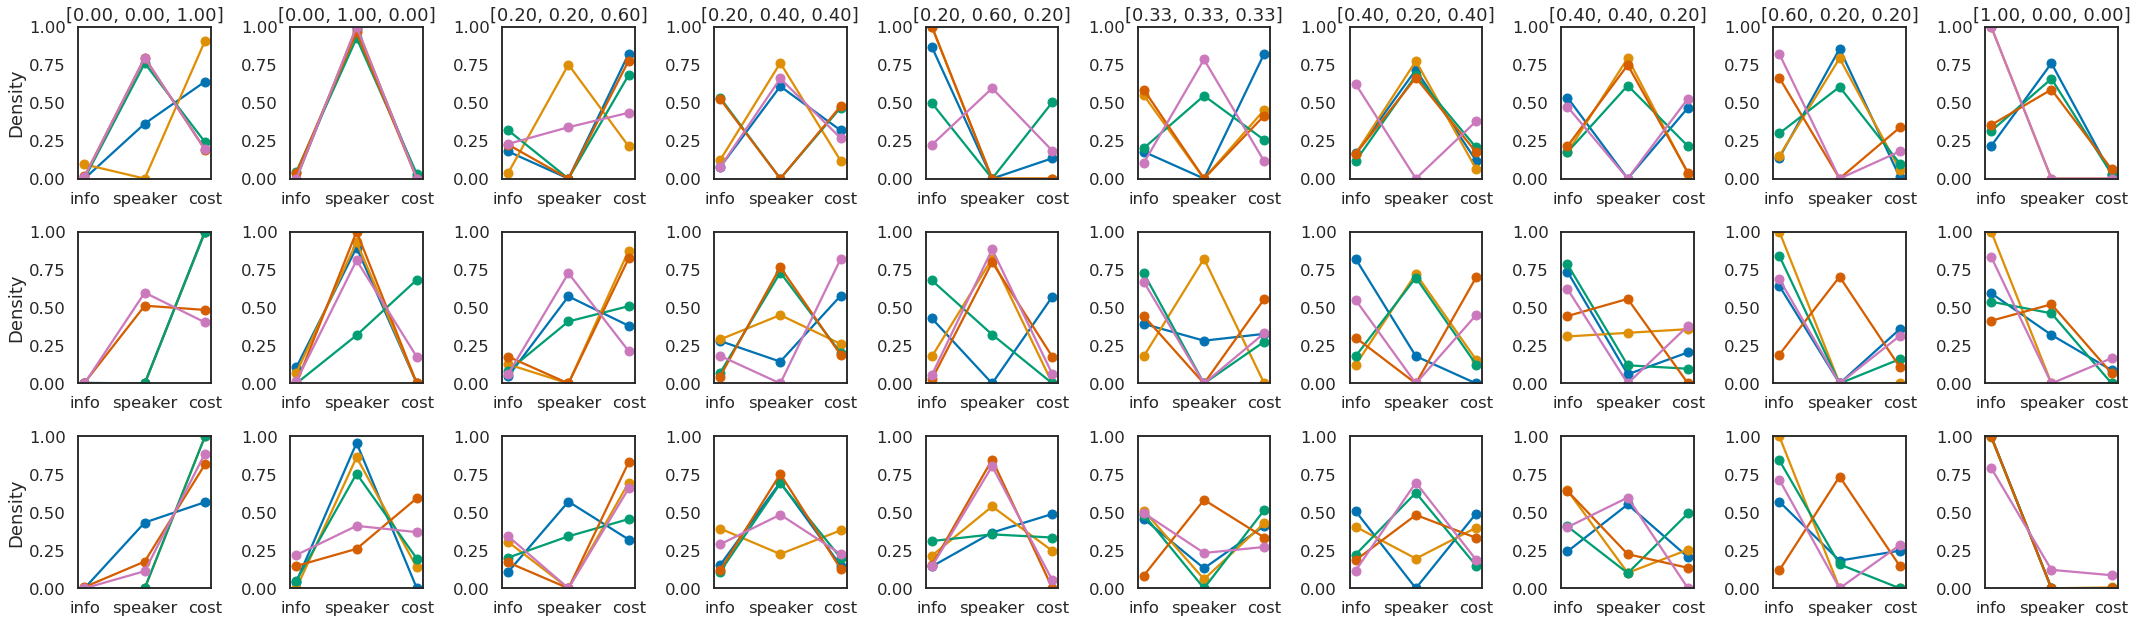

In [75]:
# color palette
pal = sns.color_palette('colorblind', 5)

# make grid
conds = param_estimates.condition.unique()
prefs = param_estimates.label.unique()
fig,axes = plt.subplots(len(prefs), len(conds), figsize=(30,9))

for row_ax, pref in enumerate(prefs):
    for col_ax, cond in enumerate(conds):

        group = param_estimates[(param_estimates.label == pref) & (param_estimates.condition == cond)]
        for _, row in group.iterrows():
            axes[row_ax,col_ax].plot([0,1,2], row.mle[:3], color=pal[row.iter], marker='o')

        # Add axis labels
        axes[row_ax,col_ax].set(xticks=[0,1,2], xticklabels=['info', 'speaker', 'cost'], ylim=(0,1))
        if row_ax == 0:
            axes[row_ax,col_ax].set(title=conds[col_ax])
        if col_ax == 0:
            axes[row_ax,col_ax].set(ylabel=prefs[col_ax].title())

fig.tight_layout() 